# Introduction

One of the major **issue** with RNN is, it suffers from **vanishing gradient**, this is **addressed in the LSTM**, thanks to Forget gate and input gate which makes Cell State or Cell memory as a skip connection.

In sequence prediction challenges, Long Short Term Memory (LSTM) networks are a type of Recurrent Neural Network that can learn **long term dependencies**.  It is used for time-series data processing, prediction, and classification.

**The core of the LSTM is cell state. Forget gate and input gate controls which information will be part of cell state.**

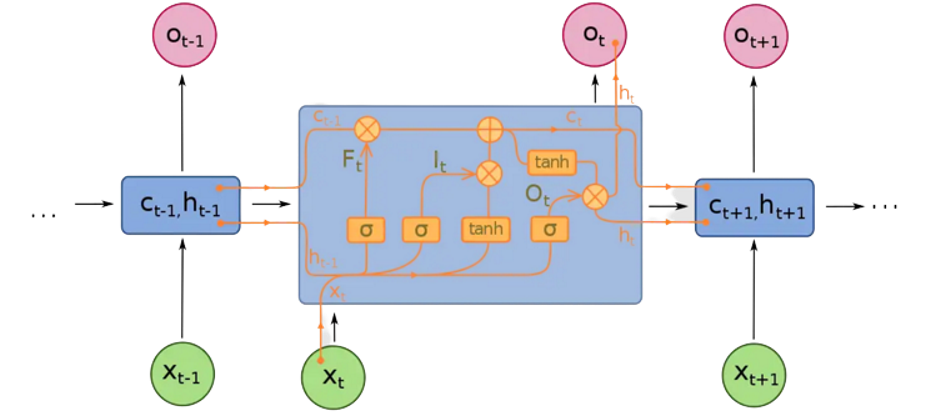


# Step by Step LSTM walkthrough

Few quick notations to keep in mind while reading LSTM architecture 
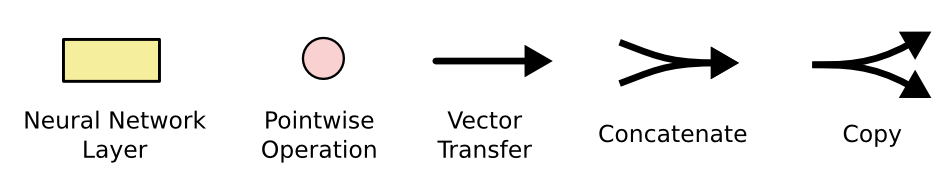

First step in the LSTM, is to **decide which information to forget from the old cell state**. Sigmoid function helps make the decision with the help of concatenated input $x_{t}$, $h_{t-1}$. 

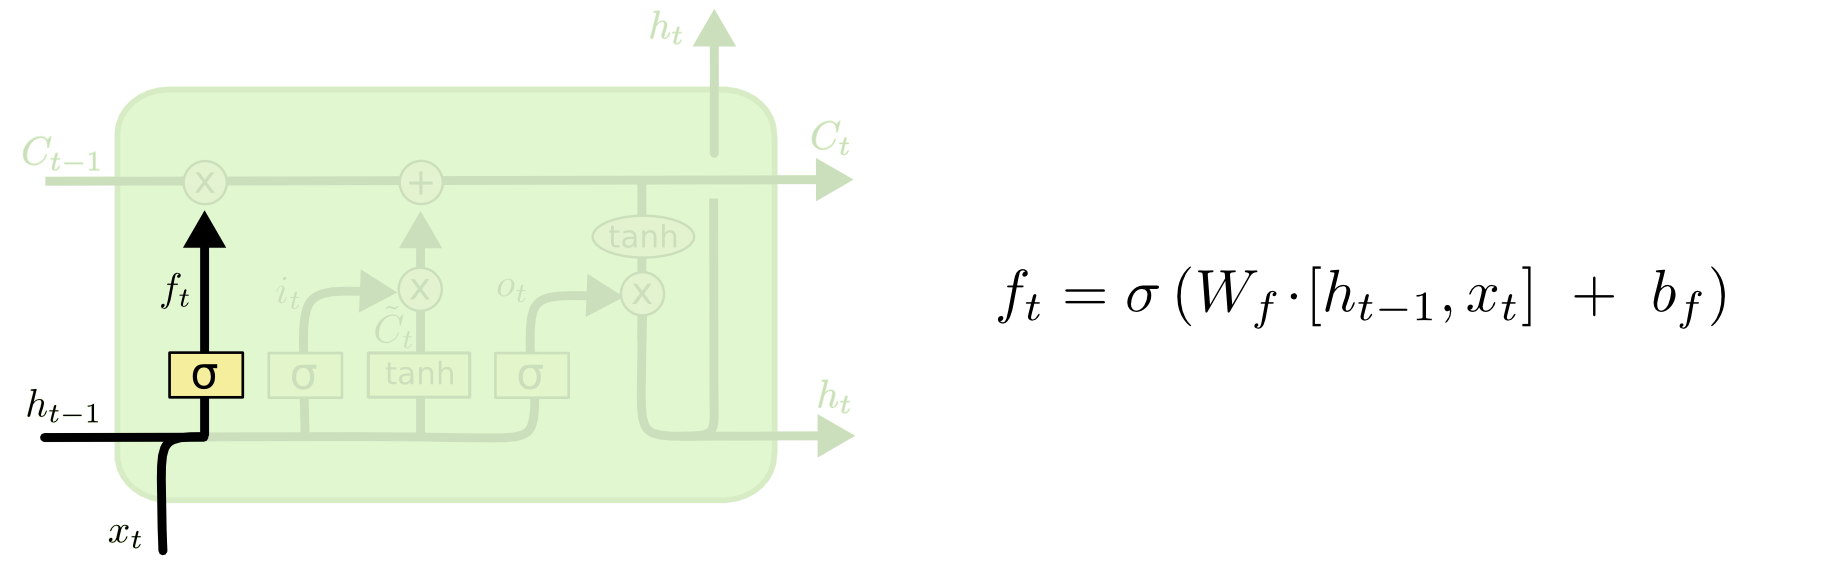

Next step is to **decide which new information to store in cell state**. Sigmoid function helps decide what information we will update and tanh function decides which new candidate values can be added into cell state. It is combined at the end, using point wise multiplication.

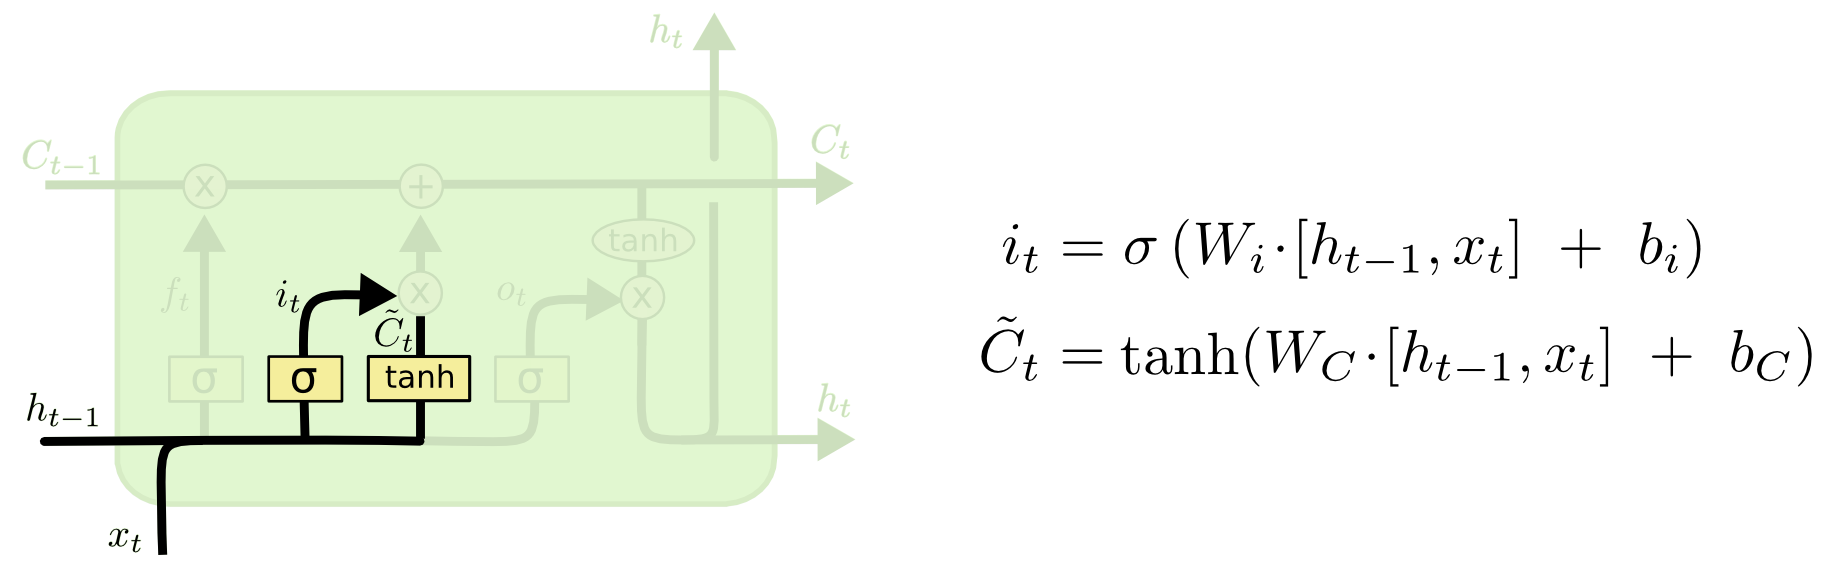

To update the old cell state, $c_{t-1}$ with new cell state $c_{t}$. **We multiply $f_{t}$ with old state, to forget the things from old cell state. Later we add new candidate values into cell state.**

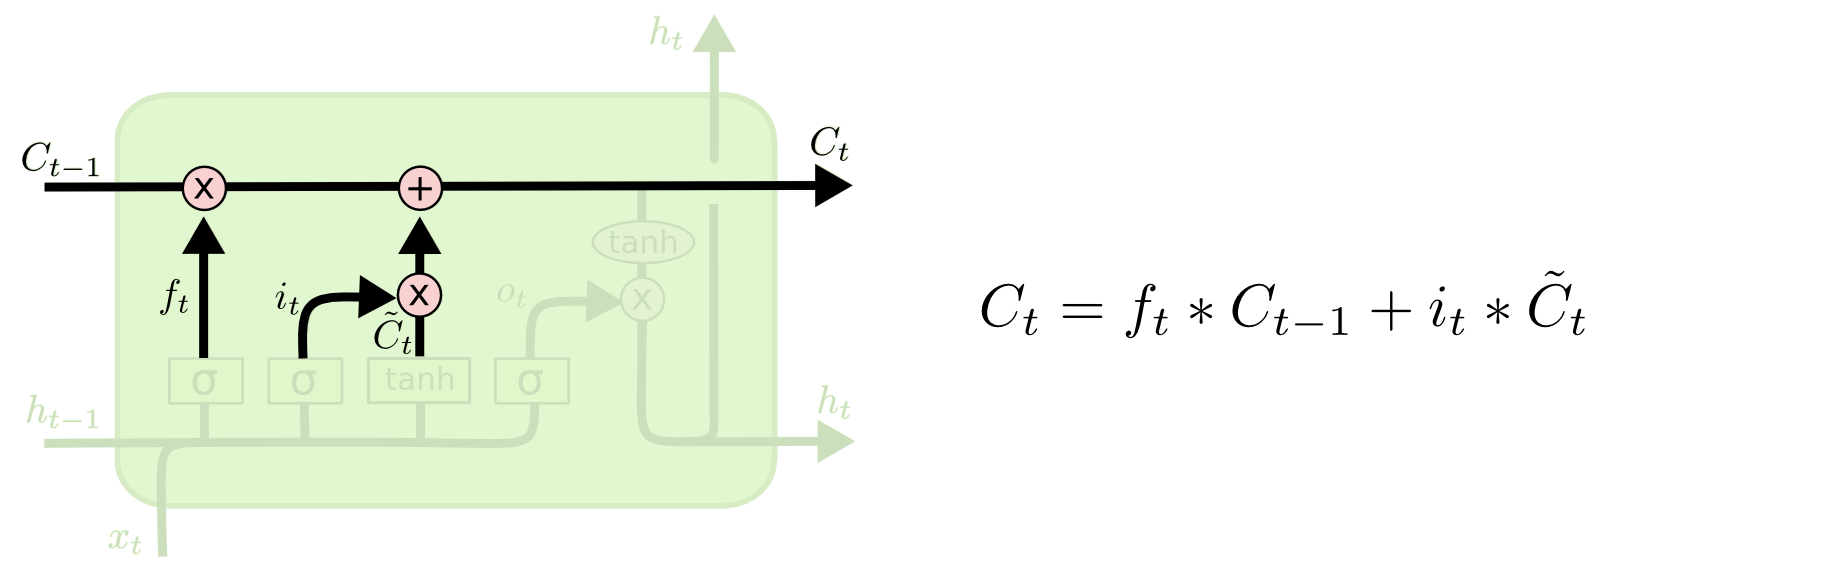

Finally, sigmoid and tanh function decides what need to be pass in the output. This is the filtered version of cell state. 
Sigmoid helps determine which part of the cell state we're going to output and tanh function push values of cell state between -1 to 1. And we multiply both to output the decided values by sigmoid function.

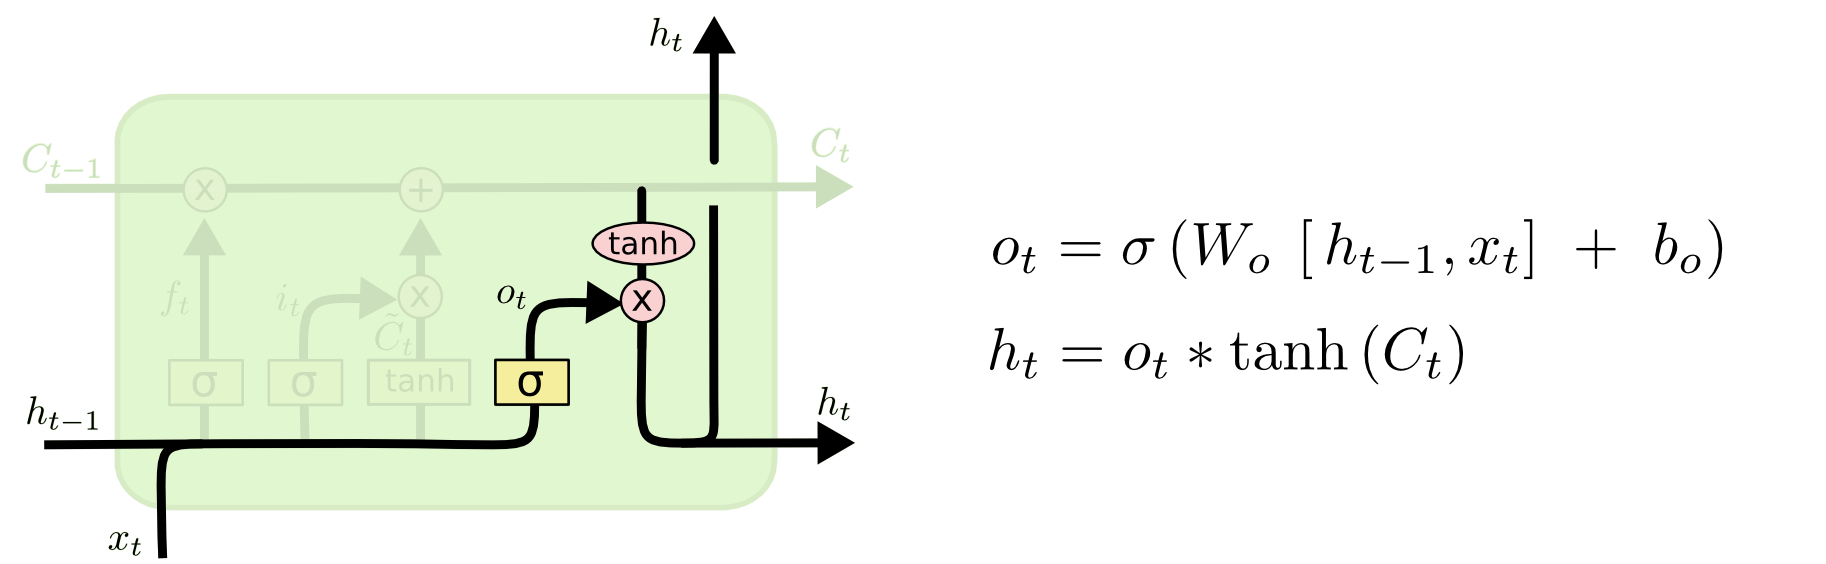

Reference: https://colah.github.io/posts/2015-08-Understanding-LSTMs/

# how LSTM address vanishing gradient problem.
Vanishing gradient problem arises due small values of gradient and results very negligible change in the weight after backpropagation. <br>
LSTM handles it, by not forgetting previous cell state, if forget gate has array of 1 and input gate has value array of 0.  This makes cell state act as a skip connection, which straight away pass value of previous cell state to next cell state. $c_t = c_{t-1}$

# Bidirectional LSTMs

Bidirectional LSTMs are an often discussed enhancement on LSTMs.
Each training sequence is presented forwards and backwards to two independent recurrent nets, both of which are coupled to the same output layer in Bidirectional Recurrent Neural Networks (BRNN). This means that the BRNN has comprehensive, sequential knowledge about all points before and after each point in a given sequence. There’s also no need to identify a (task-dependent) time window or goal delay size because the internet is free to use as much or as little of this context as it needs.

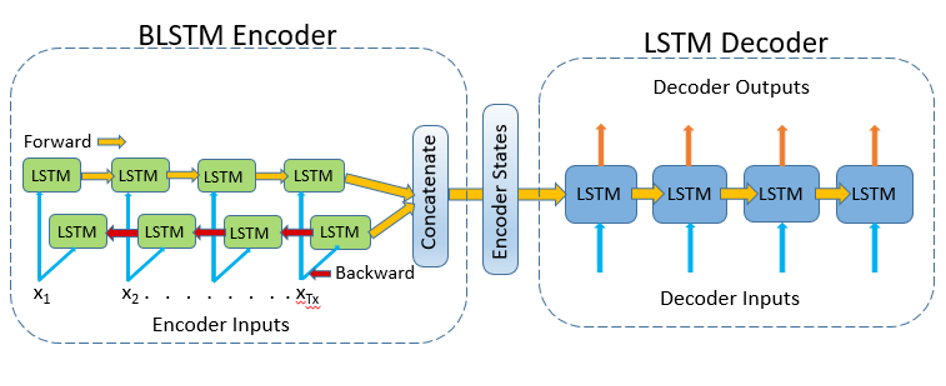

Conventional RNNs have the disadvantage of only being able to use the previous contexts. Bidirectional RNNs (BRNNs) do this by processing data in both ways with two hidden layers that feed-forward to the same output layer. When BRNN and LSTM are combined, you get a bidirectional LSTM that can access long-range context in both input directions.

## Applications
LSTM has a number of well-known applications, including:
1. Image captioning
2. Machine translation
3. Language modelling
4. Handwriting generation
5. Question answering chatbots

In [ ]:
# Basic Python Implementation
# Importing Some Relevant Libraries:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking
model = Sequential()
# Embedding layer:
model.add(
    Embedding(input_dim=num_words,
              input_length = training_length,
              output_dim=100,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))
# Masking layer for pre-trained embeddings:
model.add(Masking(mask_value=0.0))
# Recurrent layer:
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))
# Fully connected layer:
model.add(Dense(64, activation='relu'))
# Dropout for regularization:
model.add(Dropout(0.5))
# Output layer:
model.add(Dense(num_words, activation='softmax'))
# Compile the model:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## LSTM Model

import torch.nn as nn

class LSTMnet(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):

        super(LSTMnet, self).__init__()

        # Embedding layer construct integer sequences to vector sequences
        self.embedding = nn.Embedding(vocab_size, emb_dim)

        # LSTM layer process the vector sequences
        self.lstm = nn.LSTM(emb_dim, hidden_dim,
                            num_layers = n_layers,
                            bidirectional=bidirectional,
                            dropout=dropout,
                            batch_first = True)
        
        # Dense layer to predict
        self.fc = nn.Linear(hidden_dim*2, output_dim)

        # Prediction activation function
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, text_lengths):
        embedded = self.embedding(text)

        # Thanks to packing, LSTM don't see padding tokens and this makes our model better
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first = True)

        packed_output,(hidden_state, cell_state) = self.lstm(packed_embedded)

        # Concatenating the final forward and backward hidden states
        hidden = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim=1)

        dense_outputs = self.fc(hidden)

        # final activation function
        outputs = self.sigmoid(dense_outputs)

        return outputs

## Conclusion
- Long short-term memory (LSTM) is a deep learning architecture based on an artificial recurrent neural network (RNN).
- LSTMs are a viable answer for problems involving sequences and time series.
- The difficulty in training them is one of its disadvantages since even a simple model takes a lot of time and system resources to train. However, this is only a hardware constraint.
- The problem with traditional RNNs is that they can only use the prior contexts. BRNNs (Bidirectional RNNs) accomplish this by processing data in both directions.